In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv


![](https://i0.wp.com/lawlex.org/wp-content/uploads/2020/05/Cyber-Bullying640.jpg?ssl=1)

<h2>DataSet</h2>

> As social media usage becomes increasingly prevalent in every age group, a vast majority of citizens rely on this essential medium for day-to-day communication. Social media’s ubiquity means that cyberbullying can effectively impact anyone at any time or anywhere, and the relative anonymity
> of the internet makes such personal attacks more difficult to stop than traditional bullying.

* weet_text : Text of the tweet
* cyberbullying_type : Type of cyberbullying harassment.

<h3>DataSet Link</h3>

https://www.kaggle.com/andrewmvd/cyberbullying-classification

In [2]:
#Imports the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../input/cyberbullying-classification/cyberbullying_tweets.csv")

In [4]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
data['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [7]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [8]:
data.shape

(47692, 2)

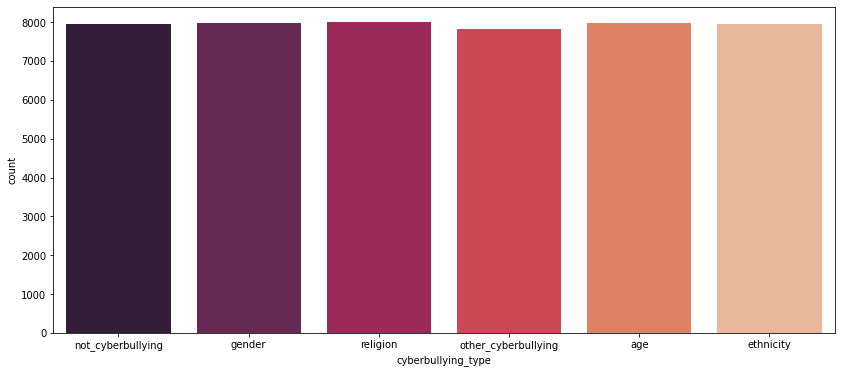

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(x ='cyberbullying_type',data = data,palette = 'rocket')
plt.show()

In [10]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("cyberbullying_type")
data

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",3
1,Why is #aussietv so white? #MKR #theblock #ImA...,3
2,@XochitlSuckkks a classy whore? Or more red ve...,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3
4,@RudhoeEnglish This is an ISIS account pretend...,3
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1
47688,Turner did not withhold his disappointment. Tu...,1
47689,I swear to God. This dumb nigger bitch. I have...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1


# Word cloud of tweet_text

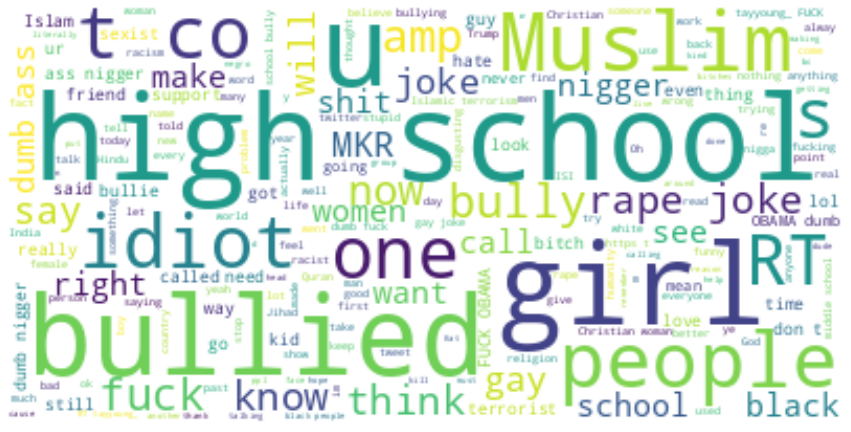

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in data.tweet_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

 # Cleaning the  tweet_texts

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['tweet_text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
corpus[2]

'xochitlsuckkk classi whore red velvet cupcak'

# Creating the Bag of Words model

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training the Naive Bayes model on the Training set

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1374    7    2   70   92   12]
 [  38 1433    3    7   64   82]
 [  28   32 1011  105  395   55]
 [  49   22   23  331 1069   78]
 [  34   14   17   52 1375   27]
 [   4   14    3   96   33 1488]]


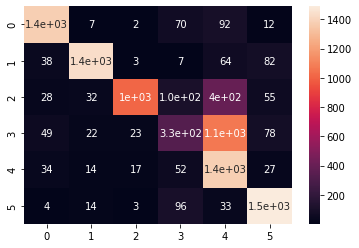

In [19]:
sns.heatmap(cm,annot =True)
plt.show()

In [20]:
acc1 = accuracy_score(y_test, y_pred)

In [21]:
print(f"Accuracy of Naive Bayes (Using Bag of words technique): {acc1}")

Accuracy of Naive Bayes (Using Bag of words technique): 0.7350875353810672


# Using TF - IDF Method.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [23]:
y=data['cyberbullying_type']

In [24]:
X.shape

(47692, 5000)

# Splitting the dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(35769, 5000)
(11923, 5000)
(35769,)
(11923,)


In [27]:
count_df = pd.DataFrame(X1_train, columns=tfidf_v.get_feature_names())

In [28]:
count_df

,aalwuhaib,ab,abandon,abc,abil,abl,abort,absolut,abt,abu,...,yr old,yu,yup,zaibatsunew,zapp,zapp fuck,zapp fuck dumb,zero,zionist,zxbzv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Naive Bayes (in TF - IDF)

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_train, y1_train)
GaussianNB()
y1_pred = classifier.predict(X1_test)

In [30]:
acc2 = accuracy_score(y1_test, y1_pred)

In [31]:
print(f"Accuracy of Naive Bayes (Using TF - IDF technique): {acc2}")

Accuracy of Naive Bayes (Using TF - IDF technique): 0.7044368028180827


# MultinomialNB Algorithm

In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X1_train, y1_train)
pred = classifier.predict(X1_test)
pred = classifier.predict(X1_test)
score = accuracy_score(y1_test, pred)

In [33]:
score

0.79568900444519

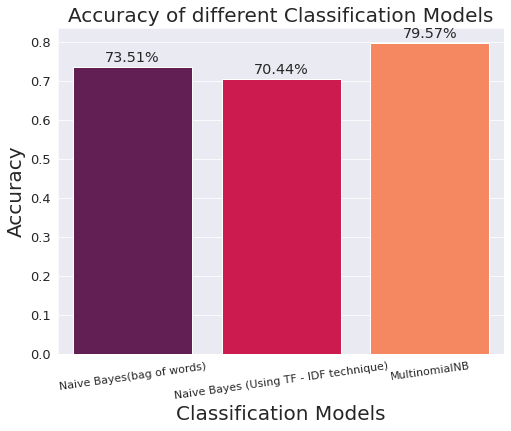

In [34]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Naive Bayes(bag of words)")
mylist.append(acc2)
mylist2.append("Naive Bayes (Using TF - IDF technique)")
mylist.append(score)
mylist2.append("MultinomialNB")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

![](https://www.volunteer.ie/wp-content/uploads/2017/08/Thank-You-word-cloud-1024x791.jpg)